# Germany

In [1]:
population_germany = 82e6

I want to compute a theoretical upper bound of the hydroelectric power production in Germany. For that I need altitues and rainfall data.

## Rainfall

I will use annual averages from all stations in Germany grouped by states. The raw data that I used can be download [here](https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/precipitation/regional_averages_rr_year.txt) from the Deutscher Wetterdienst (DWD).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [3]:
url_avg_rain = "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/precipitation/regional_averages_rr_year.txt"
precipitation = pd.read_csv(url_avg_rain, skiprows=1, sep=';', index_col='Jahr')
# Remove some useless columns
use_cols = precipitation.columns.to_numpy()[1:-1]
precipitation = precipitation[use_cols]
# Some renaming to use ü instead of ue
precipitation.rename(columns={
    'Baden-Wuerttemberg':'Baden-Württemberg',
    'Thueringen':'Thüringen'
},inplace=True)

In [4]:
precipitation.head()

,Brandenburg/Berlin,Brandenburg,Baden-Württemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thüringen,Deutschland
Jahr,,,,,,,,,,,,,,,,,
1881,521.3,521.0,828.6,804.9,649.5,494.5,643.5,643.4,792.1,711.2,675.7,776.2,731.0,536.2,588.9,655.0,693.5
1882,673.6,673.0,1255.2,1085.3,1005.1,568.5,758.8,757.3,1032.1,1078.9,785.4,1210.3,952.3,666.8,762.3,882.4,926.7
1883,500.6,500.3,870.5,832.4,656.8,518.9,620.4,619.9,754.6,713.6,684.6,819.5,655.9,474.9,527.2,593.0,687.2
1884,635.4,634.3,776.4,797.2,699.4,600.1,755.2,754.6,808.3,700.3,767.4,769.0,723.8,635.9,652.0,672.2,732.2
1885,550.2,549.7,990.9,830.2,691.8,537.9,646.7,646.1,734.6,793.3,684.6,925.1,665.0,536.3,571.5,615.7,718.4


In [5]:
precipitation.describe()

,Brandenburg/Berlin,Brandenburg,Baden-Württemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thüringen,Deutschland
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,566.952899,566.901449,939.866667,910.572464,752.644928,599.688406,729.597101,729.389130,845.999275,765.731884,761.393478,886.021014,728.493478,560.049275,622.057971,700.178986,771.071739
std,83.602847,83.563149,137.151005,119.566984,117.438727,80.923226,104.399095,104.377223,122.867614,112.322565,105.889736,147.076436,114.111010,87.764330,92.476930,103.880470,97.072492
min,390.400000,390.300000,601.500000,641.600000,477.700000,428.100000,403.800000,404.200000,501.300000,401.500000,478.200000,432.900000,463.700000,352.500000,396.200000,450.900000,551.100000
25%,512.200000,512.525000,849.900000,828.850000,676.425000,546.125000,653.725000,654.175000,764.175000,699.250000,696.100000,776.200000,653.500000,497.050000,566.375000,638.575000,703.075000
50%,568.500000,568.350000,935.750000,912.200000,750.500000,603.550000,739.450000,739.250000,852.050000,758.500000,755.850000,886.350000,737.200000,570.500000,630.650000,706.450000,773.000000
75%,616.500000,616.700000,1015.875000,977.175000,830.400000,644.750000,787.525000,786.700000,906.025000,841.225000,827.300000,989.425000,797.800000,617.200000,682.725000,766.000000,839.425000
max,788.800000,786.700000,1312.200000,1230.000000,1084.500000,815.300000,1006.800000,1006.800000,1138.200000,1078.900000,1041.400000,1274.400000,1031.900000,806.100000,868.900000,948.800000,1018.100000


In [6]:
southern = [
    'Baden-Württemberg',
    'Bayern',
    'Saarland',
    'Rheinland-Pfalz'
]
central = [
    'Nordrhein-Westfalen',
    'Hessen',
    'Thüringen',
    'Sachsen'
]
northern = [
    'Niedersachsen/Hamburg/Bremen',
    'Brandenburg/Berlin',
    'Sachsen-Anhalt',
    'Mecklenburg-Vorpommern',
    'Schleswig-Holstein'
]

In [7]:
precipitation[southern].describe()

,Baden-Württemberg,Bayern,Saarland,Rheinland-Pfalz
count,138.000000,138.000000,138.000000,138.000000
mean,939.866667,910.572464,886.021014,765.731884
std,137.151005,119.566984,147.076436,112.322565
min,601.500000,641.600000,432.900000,401.500000
25%,849.900000,828.850000,776.200000,699.250000
50%,935.750000,912.200000,886.350000,758.500000
75%,1015.875000,977.175000,989.425000,841.225000
max,1312.200000,1230.000000,1274.400000,1078.900000


In [8]:
precipitation[central].describe()

,Nordrhein-Westfalen,Hessen,Thüringen,Sachsen
count,138.000000,138.000000,138.000000,138.000000
mean,845.999275,752.644928,700.178986,728.493478
std,122.867614,117.438727,103.880470,114.111010
min,501.300000,477.700000,450.900000,463.700000
25%,764.175000,676.425000,638.575000,653.500000
50%,852.050000,750.500000,706.450000,737.200000
75%,906.025000,830.400000,766.000000,797.800000
max,1138.200000,1084.500000,948.800000,1031.900000


In [9]:
precipitation[northern].describe()

,Niedersachsen/Hamburg/Bremen,Brandenburg/Berlin,Sachsen-Anhalt,Mecklenburg-Vorpommern,Schleswig-Holstein
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,729.389130,566.952899,560.049275,599.688406,761.393478
std,104.377223,83.602847,87.764330,80.923226,105.889736
min,404.200000,390.400000,352.500000,428.100000,478.200000
25%,654.175000,512.200000,497.050000,546.125000,696.100000
50%,739.250000,568.500000,570.500000,603.550000,755.850000
75%,786.700000,616.500000,617.200000,644.750000,827.300000
max,1006.800000,788.800000,806.100000,815.300000,1041.400000


In [10]:
precipitation_southern = precipitation[southern]
precipitation_central = precipitation[central]
precipitation_northern = precipitation[northern]

In [11]:
display(precipitation_southern.head())
display(precipitation_central.head())
display(precipitation_northern.head())

,Baden-Württemberg,Bayern,Saarland,Rheinland-Pfalz
Jahr,,,,
1881,828.6,804.9,776.2,711.2
1882,1255.2,1085.3,1210.3,1078.9
1883,870.5,832.4,819.5,713.6
1884,776.4,797.2,769.0,700.3
1885,990.9,830.2,925.1,793.3


,Nordrhein-Westfalen,Hessen,Thüringen,Sachsen
Jahr,,,,
1881,792.1,649.5,655.0,731.0
1882,1032.1,1005.1,882.4,952.3
1883,754.6,656.8,593.0,655.9
1884,808.3,699.4,672.2,723.8
1885,734.6,691.8,615.7,665.0


,Niedersachsen/Hamburg/Bremen,Brandenburg/Berlin,Sachsen-Anhalt,Mecklenburg-Vorpommern,Schleswig-Holstein
Jahr,,,,,
1881,643.4,521.3,536.2,494.5,675.7
1882,757.3,673.6,666.8,568.5,785.4
1883,619.9,500.6,474.9,518.9,684.6
1884,754.6,635.4,635.9,600.1,767.4
1885,646.1,550.2,536.3,537.9,684.6


In [12]:
avg_rainfall_southern = precipitation_southern.mean().mean()
avg_rainfall_central = precipitation_central.mean().mean()
avg_rainfall_northern = precipitation_northern.mean().mean()
print('''Average rainfall of southern states = {:.0f} mm/yr
Average rainfall of central states = {:.0f} mm/yr
Average rainfall northern states = {:.0f} mm/yr'''.format(avg_rainfall_southern, avg_rainfall_central, avg_rainfall_northern))

Average rainfall of southern states = 876 mm/yr
Average rainfall of central states = 757 mm/yr
Average rainfall northern states = 643 mm/yr


In [13]:
years = precipitation.index.to_numpy()
years

array([1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891,
       1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902,
       1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913,
       1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018])

### Average annual precipitation evolution from 1881 to 2018

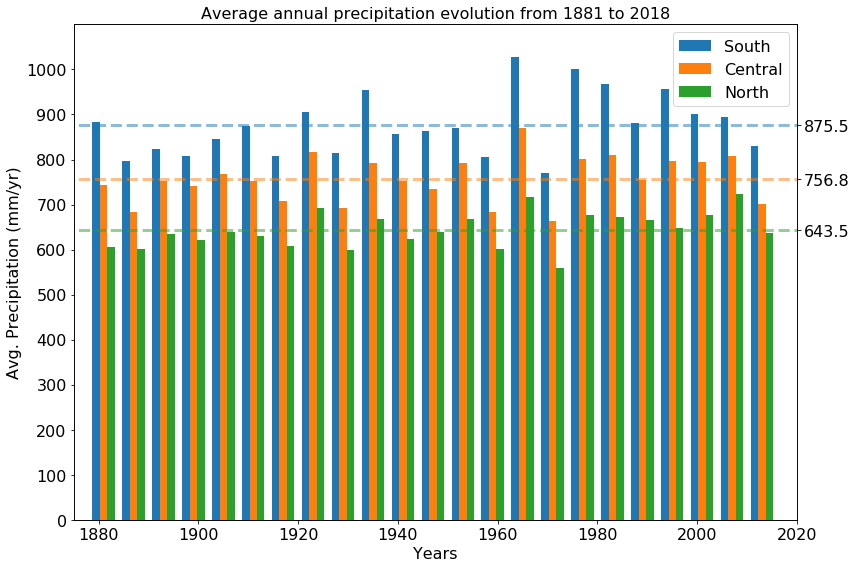

In [14]:
fig, ax  = plt.subplots(1, 1, figsize=(12,8))

years = precipitation.index.to_numpy()
size_bin = 6
assert (len(years) % size_bin == 0), "size_bin should by a divisor of len(years)"

avg_rain_south = precipitation_southern.mean(axis=1).to_numpy()
avg_rain_central = precipitation_central.mean(axis=1).to_numpy()
avg_rain_north = precipitation_northern.mean(axis=1).to_numpy()

if size_bin != 1:
    avg_rain_south = np.mean(avg_rain_south.reshape(-1, size_bin), axis=1)
    avg_rain_central = np.mean(avg_rain_central.reshape(-1, size_bin), axis=1)
    avg_rain_north = np.mean(avg_rain_north.reshape(-1, size_bin), axis=1)
    years = years[[k*size_bin for k in range(len(years) // size_bin)]]

width=1.5
ax.bar(years-width, avg_rain_south, width=width, align='center', label='South')
ax.bar(years, avg_rain_central, width=width, align='center', label='Central')
ax.bar(years+width, avg_rain_north, width=width, align='center', label='North')

# Default matplotlibb colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot averages
ax.plot([1700,2300],[avg_rainfall_southern, avg_rainfall_southern],
        '--', color=colors[0], linewidth=3, alpha=.5)
ax.plot([1700,2300],[avg_rainfall_central, avg_rainfall_central],
        '--', color=colors[1], linewidth=3, alpha=.5)
ax.plot([1700,2300],[avg_rainfall_northern, avg_rainfall_northern],
        '--', color=colors[2], linewidth=3, alpha=.5)

ax.set_xlim([1875,2020])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim([0, 1100])
ax.set_yticks(np.arange(0,1100,100))
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('Avg. Precipitation (mm/yr)', fontsize=16)
ax.legend(loc=0, fontsize=16)
ax.set_title("Average annual precipitation evolution from 1881 to 2018", fontsize=16)

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.tick_params(labelsize=16)
ax2.set_yticks([avg_rainfall_southern, avg_rainfall_central, avg_rainfall_northern])

plt.tight_layout()
#fig.savefig('images/avg_annual_rain_1881-2018.png', dpi=300)

### Average annual precipitation evolution from 2008 to 2018

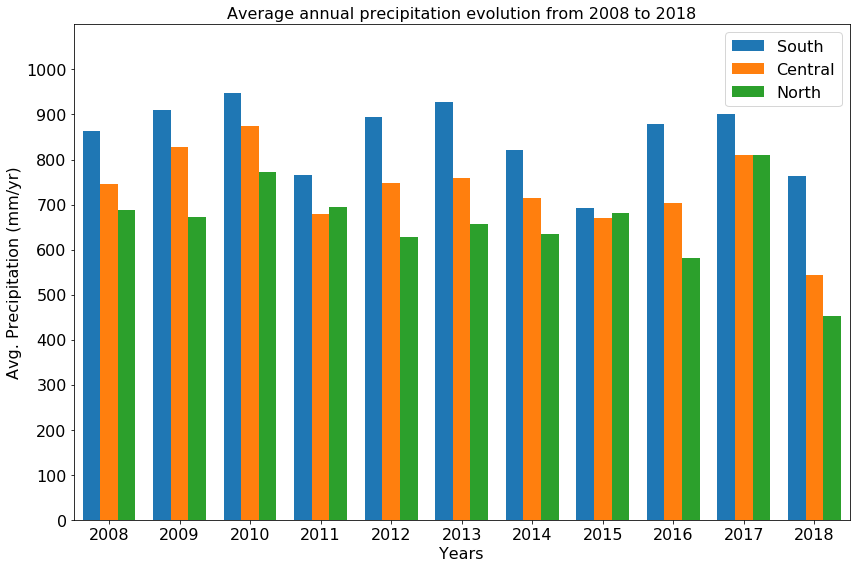

In [15]:
fig, ax  = plt.subplots(1, 1, figsize=(12,8))

years = precipitation.index.to_numpy()[-11:]
size_bin = 1
assert (len(years) % size_bin == 0), "size_bin should by a divisor of len(years)"

avg_rain_south = precipitation_southern.mean(axis=1).to_numpy()[-11:]
avg_rain_central = precipitation_central.mean(axis=1).to_numpy()[-11:]
avg_rain_north = precipitation_northern.mean(axis=1).to_numpy()[-11:]

if size_bin != 1:
    avg_rain_south = np.mean(avg_rain_south.reshape(-1, size_bin), axis=1)
    avg_rain_central = np.mean(avg_rain_central.reshape(-1, size_bin), axis=1)
    avg_rain_north = np.mean(avg_rain_north.reshape(-1, size_bin), axis=1)
    years = years[[k*size_bin for k in range(len(years) // size_bin)]]

width=.25
ax.bar(years-width, avg_rain_south, width=width, align='center', label='South')
ax.bar(years, avg_rain_central, width=width, align='center', label='Central')
ax.bar(years+width, avg_rain_north, width=width, align='center', label='North')

ax.set_xlim([2007.5,2018.5])
ax.set_ylim([0, 1100])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticks(years)
ax.set_yticks(np.arange(0,1100,100))
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('Avg. Precipitation (mm/yr)', fontsize=16)
ax.legend(loc=0, fontsize=16)
ax.set_title("Average annual precipitation evolution from 2008 to 2018", fontsize=16)
plt.tight_layout()
#fig.savefig('images/avg_annual_rain_2008-2018.png', dpi=300)

## Altitude

I also need the elevation of the land. At the end I want an average for southern, central and northern regions. For that I will take the average values for each state from [here](https://en-gb.topographic-map.com), and compute the weighted average using the areas of each state. The average altitude for Germany I obtained from [*List of countries by average elevation*](https://en.wikipedia.org/wiki/List_of_countries_by_average_elevation) article in Wikipedia.

### Area of German states

Numbers obtained from article [*Liste der deutschen Bundesländer nach Fläche*](https://de.wikipedia.org/wiki/Liste_der_deutschen_Bundesl%C3%A4nder_nach_Fl%C3%A4che) in Wikipedia. All expressed in $km^2$.

In [16]:
total_germany_area = 357578.17
area_germany_states = {
    'Bayern': 70542.03,
    'Niedersachsen': 47709.83,
    'Baden-Württemberg': 35673.71,
    'Nordrhein-Westfalen': 34112.74,
    'Brandenburg': 29654.38,
    'Mecklenburg-Vorpommern': 23292.73,
    'Hessen': 21115.67,
    'Sachsen-Anhalt': 20452.14,
    'Rheinland-Pfalz': 19858.00,
    'Sachsen': 18449.99,
    'Thüringen': 16202.37,
    'Schleswig-Holstein': 15802.27,
    'Saarland': 2571.10,
    'Berlin': 891.12,
    'Hamburg': 755.09,
    'Bremen': 419.84
}
# Test to check if sum(area_states) = total_area
#np.abs(np.sum(list(area_germany_states.values()))-total_germany_area)/total_germany_area

In [17]:
area_southern = np.sum([area_germany_states[n] for n in southern])
area_central = np.sum([area_germany_states[n] for n in central])
# A bit tricky because some small states are groupped together in northern list
area_northern = np.sum([area_germany_states[a] for b in northern for a in b.split('/')])
print('''Total area of southern states = {:.1e} km²
Total area of central states = {:.1e} km²
Total of northern states = {:.1e} km²'''.format(area_southern, area_central, area_northern))

Total area of southern states = 1.3e+05 km²
Total area of central states = 9.0e+04 km²
Total of northern states = 1.4e+05 km²


Dividing Germany in this way gives us more or less three regions with the same area $\sim 10^5$ km².

### Elevation of German states

In [18]:
# elevation in ft!!
altitude_germany = 263
# Conversion to meters: 1ft = 0.3048m
altitude_germany_states = {
    'Bayern': 2080,
    'Niedersachsen': 285,
    'Baden-Württemberg': 1939,
    'Nordrhein-Westfalen': 577,
    'Brandenburg': 400,
    'Mecklenburg-Vorpommern': 95,
    'Hessen': 932,
    'Sachsen-Anhalt': 577,
    'Rheinland-Pfalz': 935,
    'Sachsen': 965,
    'Thüringen': 1119,
    'Schleswig-Holstein': 62,
    'Saarland': 1020,
    'Berlin': 161,
    'Hamburg': 82,
    'Bremen': 39
}
# Conversion to m
altitude_germany_states = {key:value*0.3048 for (key,value) in altitude_germany_states.items()}

I was expecting that the following equality holds but I find a 14% deviation
$$
\text{Avg altitude Germany} = \sum_{s\in\text{states}}\left(\text{Avg altitude state s}\right)\;\times\frac{\text{Area state s}}{\text{Total area Germany}}
$$

In [19]:
# Test to check if average altitude weighted by area
np.sum(np.sum([val * area_germany_states[key]/total_germany_area for (key,val) in altitude_germany_states.items()])
       - altitude_germany)/altitude_germany

0.14429262113369637

Nevertheless, I will use these numbers to compute the average altitudes of the three regions

$$
\text{Avg altitude region} = \sum_{s\in\text{region}}\left(\text{Avg altitude state s}\right)\;\times\frac{\text{Area state s}}{\text{Total area region}}
$$

In [20]:
altitude_southern = np.sum([altitude_germany_states[s] * area_germany_states[s]/area_southern for s in southern])
altitude_central = np.sum([altitude_germany_states[s] * area_germany_states[s]/area_central for s in central])
altitude_northern = np.sum([altitude_germany_states[s] * area_germany_states[s]/area_northern\
                            for b in northern for s in b.split('/')])
print('''Average altitude of southern states = {:.0f} m
Average altitude of central states = {:.0f} m
Average altitude of northern states = {:.0f} m'''.format(altitude_southern, altitude_central, altitude_northern))

Average altitude of southern states = 562 m
Average altitude of central states = 255 m
Average altitude of northern states = 89 m


## Theoretical upper bound to the hydropower per unit area in Germany

For this I use the same formula as David JC MacKay in [*Sustainable Energy – without the hot air*](https://www.withouthotair.com/) (p.55)

$$
\frac{P_\text{max}}{m^2} = \left<\text{rainfall}\right>_\text{yr}\times\rho\times g\times\left<\text{altitude}\right>
$$

In [21]:
def max_power_per_area(rainfall, altitude, water_density=1000, g=10):
    # rainfall in mm/yr = l/m^2/yr = 10^-3 m^3/m^2/yr = 10^-3 m/yr
    # output in W/m^2
    year = 365*24*60*60
    return rainfall * 1e-3 / year * water_density * g * altitude

def W_to_kWh_per_day(W):
    return W * 24/1000

In [22]:
# Tests with numbers from the book
# Lowlands: Bedford (UK), 584 mm/yr, 100 m, 2700 m²/person
# Highlands: Kinlochewe (UK), 2278 mm/yr, 300 m, 1300 m^2/person
print("Lowlands: {:.2f} W/m² -> {:.0f} kWh/d"
      .format(max_power_per_area(584,100), W_to_kWh_per_day(max_power_per_area(584,100)*2700)))
print("Highlands: {:.2f} W/m² -> {:.0f} kWh/d"
      .format(max_power_per_area(2278,300), W_to_kWh_per_day(max_power_per_area(2278,300)*1300)))

Lowlands: 0.02 W/m² -> 1 kWh/d
Highlands: 0.22 W/m² -> 7 kWh/d


In [23]:
max_power_area_southern = max_power_per_area(avg_rainfall_southern, altitude_southern)
max_power_area_central = max_power_per_area(avg_rainfall_central, altitude_central)
max_power_area_northern = max_power_per_area(avg_rainfall_northern, altitude_northern)
print('''Max power per area of southern states = {:.2f} W/m²
Max power per area of central states = {:.2f} W/m²
Max power per area of northern states = {:.2f} W/m²'''
      .format(max_power_area_southern, max_power_area_central, max_power_area_northern))

Max power per area of southern states = 0.16 W/m²
Max power per area of central states = 0.06 W/m²
Max power per area of northern states = 0.02 W/m²


Now in order to obtain the values in kWh per day and per person I will multiply these power per area numbers of each region with the total area of each region per person (assuming that each region is equally shared between 82 millions).

In [24]:
max_power_southern = max_power_area_southern * area_southern * 1e6 / population_germany
max_power_central = max_power_area_central * area_central * 1e6 / population_germany
max_power_northern = max_power_area_northern * area_southern * 1e6 / population_germany
total_max_power_germany = max_power_southern + max_power_central + max_power_northern
print('''Max power of southern states = {:.1f} kWh/d/p
Max power of central states = {:.1f} kWh/d/p
Max power of northern states = {:.1f} kWh/d/p
--------------------------------------------
Total max power of Germany = {:.1f} kWh/d/p'''
      .format(W_to_kWh_per_day(max_power_southern), W_to_kWh_per_day(max_power_central),
              W_to_kWh_per_day(max_power_northern), W_to_kWh_per_day(total_max_power_germany)))

Max power of southern states = 5.9 kWh/d/p
Max power of central states = 1.6 kWh/d/p
Max power of northern states = 0.7 kWh/d/p
--------------------------------------------
Total max power of Germany = 8.2 kWh/d/p


What should we estimate is the plausible practical limit? Well, MacKay guesses a 20% of the upper bound. Why?
> *This is the absolute upper limit for lowland hydroelectric power, if every river were dammed and every drop perfectly exploited. Realistically, we will only ever dam rivers with substantial height drops, with catchment areas much smaller than the whole country. Much of the water evaporates before it gets  nywhere near a turbine, and no hydroelectric system exploits the full potential energy of the water.*

In [25]:
estimation_hydro_southern = max_power_southern * .2
estimation_hydro_central = max_power_central * .2
estimation_hydro_northern = max_power_northern * .2
estimation_hydro_germany = total_max_power_germany * .2
print('''Estimation southern states = {:.1f} kWh/d/p
Estimation central states = {:.1f} kWh/d/p
Estimation northern states = {:.1f} kWh/d/p
--------------------------------------------
Total max power of Germany = {:.1f} kWh/d/p'''
      .format(W_to_kWh_per_day(estimation_hydro_southern), W_to_kWh_per_day(estimation_hydro_central),
              W_to_kWh_per_day(estimation_hydro_northern), W_to_kWh_per_day(estimation_hydro_germany)))

Estimation southern states = 1.2 kWh/d/p
Estimation central states = 0.3 kWh/d/p
Estimation northern states = 0.1 kWh/d/p
--------------------------------------------
Total max power of Germany = 1.6 kWh/d/p


---

### Actual hydropower capacity and production in Germany (2018)
*Sources*:
 * [Renewables 2019 Global Status Report](https://www.ren21.net/wp-content/uploads/2019/05/gsr_2019_full_report_en.pdf) (p.22)
 * [International Hydropower Association](https://www.hydropower.org/country-profiles/germany)

In [26]:
total_hydropower_capacity = 1132e9 # 1132 GW
german_hydropower_capacity = 11258e6 # 11258 MW
print("Germany hydropower capacity accounts for a ~{:.1f}% of the world capacity".format(\
german_hydropower_capacity/total_hydropower_capacity*100))

Germany hydropower capacity accounts for a ~1.0% of the world capacity


In [27]:
energy_hydro_germany = 16290e9 # GW·h
energy_hydro_germany_p_d = energy_hydro_germany / population_germany / 365 / 1e3
print("Germany generation from hydropower = {:.1f} kWh/d/p".format(energy_hydro_germany_p_d))

Germany generation from hydropower = 0.5 kWh/d/p


The plausible estimation taking a 20% of the upper bound is 1.1 kWh/d/p higher than the actual real number from 2018. This means that Germany can still increase the electricity generation from hydropower. However, the role of hydropower isn't and **will never be providing a relevant percentage of the energy consuption in Germany**.